Install tf2_yolov4 with pip.

Download weights from darknet YoloV4 trained on COCO and convert them to tensorflow weights.

Instanciate YoloV4 model, load COCO weights and run prediction on a single image.

In [1]:
!pip install --no-cache-dir https://github.com/sicara/tf2-yolov4/archive/master.zip
!pip install tensorflow==2.2.0
!pip install tensorflow-addons==0.11.2

     - 2.7 MB 672 kB/s
     |████████████████████████████████| 1.1 MB 4.4 MB/s 
  Created wheel for tf2-yolov4: filename=tf2_yolov4-0.1.0-py3-none-any.whl size=20158 sha256=802ab10027c9077b1dab3a351eca129a9559bb667409b0007048e4fbf26372fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-k1cy5zdf/wheels/56/ba/d4/430cf7011ba67118d957b8d5b3d46b312eca092cde0ba9638c
Successfully built tf2-yolov4
     |████████████████████████████████| 516.2 MB 4.8 kB/s 
     |████████████████████████████████| 2.9 MB 21.3 MB/s 
     |████████████████████████████████| 454 kB 44.3 MB/s 
     |████████████████████████████████| 3.0 MB 42.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard

Get COCO pretrained weights
First, download yolov4.weights from AlexeyAB/darknet repository. The yolov4.weights file length should be 257717640. If not, rerun the cell.

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT" -O yolov4.weights
!rm -rf /tmp/cookies.txt
!ls -la ./yolov4.weights

--2021-10-29 03:00:02--  https://docs.google.com/uc?export=download&confirm=TOlg&id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
Resolving docs.google.com (docs.google.com)... 64.233.189.139, 64.233.189.101, 64.233.189.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-18-docs.googleusercontent.com/docs/securesc/rli2rm3hi8u12i4qvhmfkqgj0le7jbmv/u5265cb9mvu7f1i6dpanq63sevd8juf8/1635476400000/14889149095783116612/08664275445773315786Z/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT?e=download [following]
--2021-10-29 03:00:02--  https://doc-04-18-docs.googleusercontent.com/docs/securesc/rli2rm3hi8u12i4qvhmfkqgj0le7jbmv/u5265cb9mvu7f1i6dpanq63sevd8juf8/1635476400000/14889149095783116612/08664275445773315786Z/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT?e=download
Resolving doc-04-18-docs.googleusercontent.com (doc-04-18-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting

tf2_yolov4 provides a convert-darknet-weights, a script to convert a darknet weights file (.weights) to a tensorflow weights file (.h5):

In [3]:
!convert-darknet-weights yolov4.weights -o yolov4.h5
!ls -la ./yolov4.h5

2021-10-29 03:00:10.253654: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-29 03:00:10.313736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 03:00:10.314589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.562GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-10-29 03:00:10.332264: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-29 03:00:10.543584: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-29 03:00:10.596856: I tensorflow/stream_executor/platform/default

Run a prediction
Import tensorflow, tf2_yolov4 model and anchors

In [4]:
import tensorflow as tf

from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4

HEIGHT, WIDTH = (640, 960)

upload an image

In [5]:
from google.colab import files
from IPython.display import Image

In [6]:
uploaded = files.upload()

Saving david-beckham-gq-0416-2.jpeg to david-beckham-gq-0416-2.jpeg


Open and preprocess the image with TensorFlow:

In [7]:
image = tf.io.read_file("./david-beckham-gq-0416-2.jpeg") 
image = tf.image.decode_image(image)
image = tf.image.resize(image, (HEIGHT, WIDTH))
images = tf.expand_dims(image, axis=0) / 255.0

Create YoloV4 model and load COCO weights:

In [8]:
model = YOLOv4(
    input_shape=(HEIGHT, WIDTH, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)

model.load_weights("./yolov4.h5")
model.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/options.py:47: RuntimeWarning: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/mish.py", line 44, in mish
    return _mish_custom_op(x)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_addons/activations/mish.py", line 59, in _mish_custom_op
    return _activation_so.ops.addons_mish(x)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/resource_loader.py", line 64, in ops
    self._ops = tf.load_op_library(get_path_to_datafile(self.relative_path))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/load_library.py", line 58, in load_op_library
    lib_handle = py_tf.TF_LoadLibrary(library_filename)
tensorflow.python.framework.errors_impl.NotFoundError: /usr/local/lib/python3.7/dist-packages/tensorflow_addons/custom_ops/activations/_activation_ops.so: undefined symbol: _ZN10tensorflow20OpKernelConstruction14MatchSign

Model: "YOLOv4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 640, 960, 3) 0                                            
__________________________________________________________________________________________________
CSPDarknet53 (Model)            [(None, 80, 120, 256 26652512    input_8[0][0]                    
__________________________________________________________________________________________________
YOLOv4_neck (Model)             [(None, 80, 120, 128 15857152    CSPDarknet53[1][0]               
                                                                 CSPDarknet53[1][1]               
                                                                 CSPDarknet53[1][2]               
_____________________________________________________________________________________________

In [9]:
boxes, scores, classes, valid_detections = model.predict(images)

Draw the output bounding boxes:

In [10]:
# COCO classes
CLASSES = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

Since we are only prediting the person class in the image, so CLASSES[cl] == 'person'

In [11]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def plot_results(pil_img, boxes, scores, classes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()

    for (xmin, ymin, xmax, ymax), score, cl in zip(boxes.tolist(), scores.tolist(), classes.tolist()):
        if score > 0 and CLASSES[cl] == 'person':
          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=COLORS[cl % 6], linewidth=3))
          text = f'{CLASSES[cl]}: {score:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

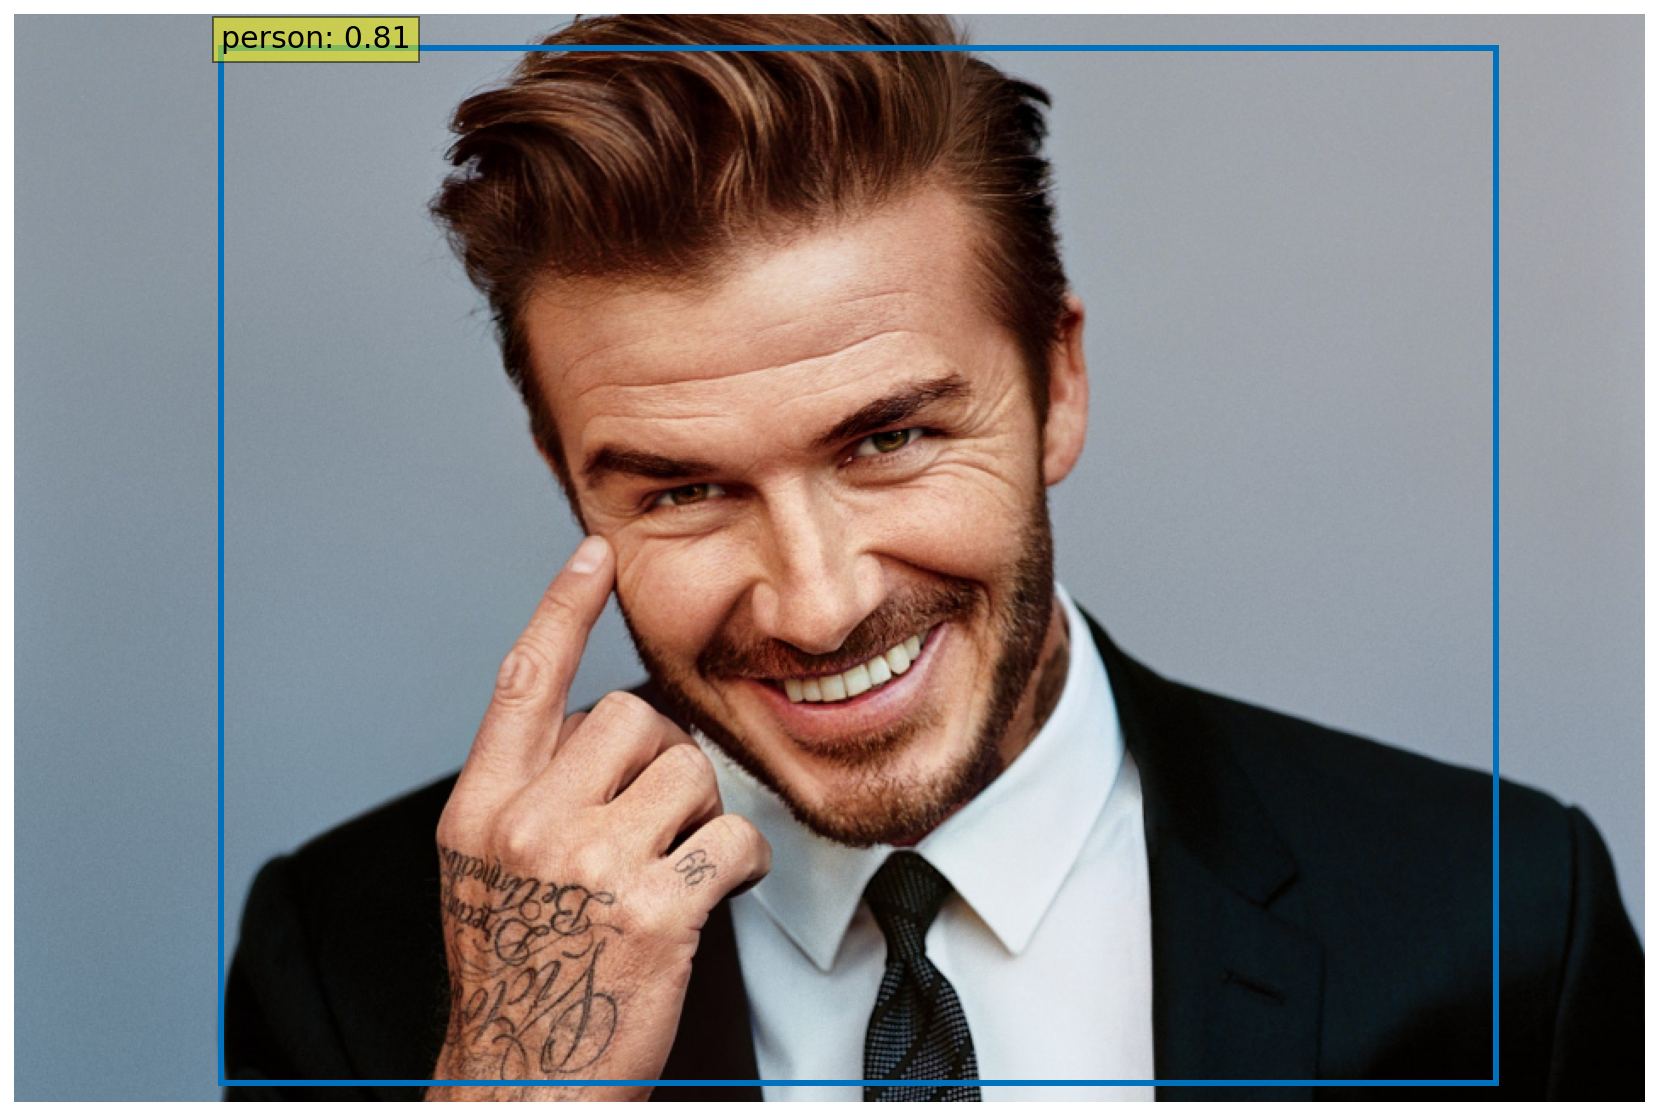

In [12]:
plot_results(
    images[0],
    boxes[0] * [WIDTH, HEIGHT, WIDTH, HEIGHT],
    scores[0],
    classes[0].astype(int),
)